# This is a code for predicting S&P 500 stock data which is from kaggle data

## https://www.kaggle.com/camnugent/sandp500

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

/home/user/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/user/anaconda3/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [2]:
data = pd.read_csv("data/all_stocks_5yr.csv")

In [3]:
print(len(data))
print(len(data[data["Name"] == "MMM"]))

619040
1259


In [4]:
# スリーエムという銘柄に注目
cl = data[data["Name"] == "MMM"].close.values

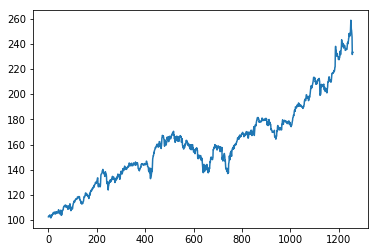

In [5]:
plt.plot(cl)

In [6]:
scl = MinMaxScaler()
cl = cl.reshape(cl.shape[0],1) # １次元から２次元に変換（行ベクトルから列ベクトルへ）
cl = scl.fit_transform(cl) # 0〜1に正規化

In [7]:
# X=[data[t-look_back],...,data[t-1]], Y=data[t]となるデータセットに変換する関数
def processData(data, lb=1):
    X, Y = [], []
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb), 0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)

In [8]:
LOOK_BACK = 7 # 何日前まで見るか

X,y = processData(cl,LOOK_BACK)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]

#Reshape data for (Sample, Timestep, Features)
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


In [16]:
# モデルの構築
model = Sequential()
model.add(LSTM(256, input_shape=(LOOK_BACK,1)))
model.add(Dense(1))
model.compile(optimizer="sgd",loss="mse")

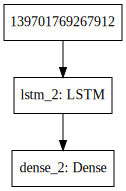

In [17]:
# モデルの内容
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [18]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_test, y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/200
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0547 - val_loss: 0.2518
Epoch 2/200
1000/1000 [==============================] - 1s 837us/step - loss: 0.0204 - val_loss: 0.1901
Epoch 3/200
1000/1000 [==============================] - 1s 794us/step - loss: 0.0183 - val_loss: 0.1744
Epoch 4/200
1000/1000 [==============================] - 1s 783us/step - loss: 0.0175 - val_loss: 0.1656
Epoch 5/200
1000/1000 [==============================] - 1s 790us/step - loss: 0.0168 - val_loss: 0.1557
Epoch 6/200
1000/1000 [==============================] - 1s 809us/step - loss: 0.0162 - val_loss: 0.1499
Epoch 7/200
1000/1000 [==============================] - 1s 802us/step - loss: 0.0155 - val_loss: 0.1451
Epoch 8/200
1000/1000 [==============================] - 1s 805us/step - loss: 0.0149 - val_loss: 0.1413
Epoch 9/200
1000/1000 [==============================] - 1s 834us/step - loss: 0.0143 - val_loss: 0.1354
Epoch 10/2

1000/1000 [==============================] - 1s 782us/step - loss: 5.3420e-04 - val_loss: 0.0047
Epoch 78/200
1000/1000 [==============================] - 1s 746us/step - loss: 5.1085e-04 - val_loss: 0.0044
Epoch 79/200
1000/1000 [==============================] - 1s 769us/step - loss: 4.8899e-04 - val_loss: 0.0042
Epoch 80/200
1000/1000 [==============================] - 1s 750us/step - loss: 4.6827e-04 - val_loss: 0.0040
Epoch 81/200
1000/1000 [==============================] - 1s 768us/step - loss: 4.4891e-04 - val_loss: 0.0038
Epoch 82/200
1000/1000 [==============================] - 1s 766us/step - loss: 4.3044e-04 - val_loss: 0.0037
Epoch 83/200
1000/1000 [==============================] - 1s 759us/step - loss: 4.1339e-04 - val_loss: 0.0034
Epoch 84/200
1000/1000 [==============================] - 1s 758us/step - loss: 3.9779e-04 - val_loss: 0.0033
Epoch 85/200
1000/1000 [==============================] - 1s 762us/step - loss: 3.8287e-04 - val_loss: 0.0031
Epoch 86/200
1000/1000 

Epoch 150/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7325e-04 - val_loss: 5.8292e-04
Epoch 151/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7298e-04 - val_loss: 5.7906e-04
Epoch 152/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7271e-04 - val_loss: 5.6544e-04
Epoch 153/200
1000/1000 [==============================] - 1s 1ms/step - loss: 1.7272e-04 - val_loss: 5.6881e-04
Epoch 154/200
1000/1000 [==============================] - 1s 885us/step - loss: 1.7216e-04 - val_loss: 5.8701e-04
Epoch 155/200
1000/1000 [==============================] - 1s 781us/step - loss: 1.7247e-04 - val_loss: 5.6247e-04
Epoch 156/200
1000/1000 [==============================] - 1s 778us/step - loss: 1.7228e-04 - val_loss: 5.6603e-04
Epoch 157/200
1000/1000 [==============================] - 1s 778us/step - loss: 1.7220e-04 - val_loss: 5.6769e-04
Epoch 158/200
1000/1000 [==============================] - 1s 856us/step - loss: 1.7209e

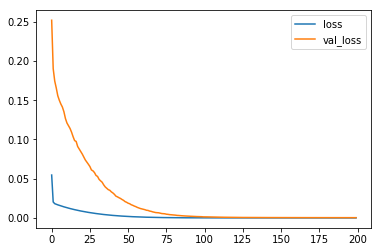

In [19]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend(loc="upper right")

In [20]:
import math
from sklearn.metrics import mean_squared_error

trainPred = model.predict(X_train)
testPred = model.predict(X_test)

trainPred =  scl.inverse_transform(trainPred)
trainY = scl.inverse_transform([y_train])
testPred = scl.inverse_transform(testPred)
testY = scl.inverse_transform([y_test])

# 平均二乗誤差のルートで評価
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPred[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPred[:,0]))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 2.05
Test RMSE: 3.47


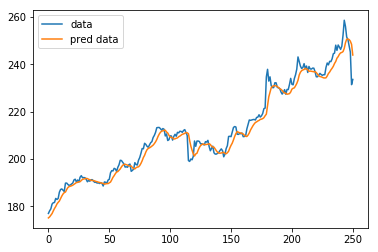

In [21]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="data")
plt.plot(scl.inverse_transform(Xt), label="pred data")
plt.legend(loc = "upper left")

In [22]:
model.save_weights('./weight/lb_7_op_adam_ep_300.hdf5')